In [1]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:

connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)

In [177]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd

import numpy  as np

In [178]:
query = '''SELECT * FROM sakila.film f
JOIN sakila.inventory i USING (film_id)
JOIN sakila.rental fa USING (inventory_id)
JOIN sakila.film_category fc USING (film_id)
JOIN sakila.category c USING (category_id)
JOIN sakila.payment p USING (rental_id);'''
data = pd.read_sql_query(query, engine)
data.head()

,rental_id,category_id,film_id,inventory_id,title,description,release_year,language_id,original_language_id,rental_duration,...,last_update,last_update,name,last_update,payment_id,customer_id,staff_id,amount,payment_date,last_update
0,10895,1,19,93,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,...,2006-02-15 21:30:53,2006-02-15 05:07:09,Action,2006-02-15 04:46:27,2104,77,1,0.99,2005-08-02 01:16:59,2006-02-15 22:12:50
1,12268,1,19,93,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,...,2006-02-15 21:30:53,2006-02-15 05:07:09,Action,2006-02-15 04:46:27,1093,39,2,0.99,2005-08-18 04:26:54,2006-02-15 22:12:38
2,3150,1,19,94,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,...,2006-02-15 21:30:53,2006-02-15 05:07:09,Action,2006-02-15 04:46:27,930,34,1,0.99,2005-06-20 20:35:28,2006-02-15 22:12:36
3,5072,1,19,94,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,...,2006-02-15 21:30:53,2006-02-15 05:07:09,Action,2006-02-15 04:46:27,6848,254,1,3.99,2005-07-09 05:01:58,2006-02-15 22:14:52
4,9080,1,19,94,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,...,2006-02-15 21:30:53,2006-02-15 05:07:09,Action,2006-02-15 04:46:27,7479,276,1,1.99,2005-07-30 08:02:39,2006-02-15 22:15:16


In [180]:
data['return_date'] = pd.to_datetime(data['return_date']).dt.date
data['rental_date'] = pd.to_datetime(data['rental_date']).dt.date
data['duration_of_rental'] = (data['return_date'] - data['rental_date'])
data['may_target'] = pd.DatetimeIndex(data['rental_date']).month
 
data. head()


,rental_id,category_id,film_id,inventory_id,title,description,release_year,language_id,original_language_id,rental_duration,...,name,last_update,payment_id,customer_id,staff_id,amount,payment_date,last_update,duration_of_rental,may_target
0,10895,1,19,93,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,...,Action,2006-02-15 04:46:27,2104,77,1,0.99,2005-08-02 01:16:59,2006-02-15 22:12:50,1 days,8
1,12268,1,19,93,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,...,Action,2006-02-15 04:46:27,1093,39,2,0.99,2005-08-18 04:26:54,2006-02-15 22:12:38,5 days,8
2,3150,1,19,94,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,...,Action,2006-02-15 04:46:27,930,34,1,0.99,2005-06-20 20:35:28,2006-02-15 22:12:36,6 days,6
3,5072,1,19,94,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,...,Action,2006-02-15 04:46:27,6848,254,1,3.99,2005-07-09 05:01:58,2006-02-15 22:14:52,9 days,7
4,9080,1,19,94,AMADEUS HOLY,A Emotional Display of a Pioneer And a Technic...,2006,1,None,6,...,Action,2006-02-15 04:46:27,7479,276,1,1.99,2005-07-30 08:02:39,2006-02-15 22:15:16,7 days,7


In [181]:
def boolean(x):
    if x==5:
        return 1
    else:
        return 0

In [182]:
data['may_target'] = list(map(boolean, data['may_target']))

In [183]:
 data= data.drop(['category_id', 'rental_id', 'inventory_id', 'description', 'release_year', 'language_id', 'original_language_id', 'last_update',
                     'last_update', 'rental_date', 'customer_id', 'return_date', 'staff_id', 'replacement_cost', 'payment_id', 'payment_date'], axis=1)

In [184]:
data.head(20)


,film_id,title,rental_duration,rental_rate,length,rating,special_features,store_id,name,amount,duration_of_rental,may_target
0,19,AMADEUS HOLY,6,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",1,Action,0.99,1 days,0
1,19,AMADEUS HOLY,6,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",1,Action,0.99,5 days,0
2,19,AMADEUS HOLY,6,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",1,Action,0.99,6 days,0
3,19,AMADEUS HOLY,6,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",1,Action,3.99,9 days,0
4,19,AMADEUS HOLY,6,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",1,Action,1.99,7 days,0
5,19,AMADEUS HOLY,6,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",1,Action,1.99,7 days,0
6,19,AMADEUS HOLY,6,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",1,Action,0.99,1 days,1
7,19,AMADEUS HOLY,6,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",1,Action,0.99,3 days,0
8,19,AMADEUS HOLY,6,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",1,Action,0.99,5 days,0
9,19,AMADEUS HOLY,6,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",1,Action,0.99,6 days,0


In [185]:
data.shape

(16044, 12)

In [186]:
data.dtypes

film_id                         int64
title                          object
rental_duration                 int64
rental_rate                   float64
length                          int64
rating                         object
special_features               object
store_id                        int64
name                           object
amount                        float64
duration_of_rental    timedelta64[ns]
may_target                      int64
dtype: object

In [187]:
data.isna().sum()

film_id                 0
title                   0
rental_duration         0
rental_rate             0
length                  0
rating                  0
special_features        0
store_id                0
name                    0
amount                  0
duration_of_rental    183
may_target              0
dtype: int64

In [188]:
time_median = data['duration_of_rental'].median()
time_median
data['duration_of_rental'] = data['duration_of_rental'].replace({np.nan: time_median}).dt.days

In [189]:
data.isna().sum()

film_id               0
title                 0
rental_duration       0
rental_rate           0
length                0
rating                0
special_features      0
store_id              0
name                  0
amount                0
duration_of_rental    0
may_target            0
dtype: int64

In [190]:
data.dtypes

film_id                 int64
title                  object
rental_duration         int64
rental_rate           float64
length                  int64
rating                 object
special_features       object
store_id                int64
name                   object
amount                float64
duration_of_rental      int64
may_target              int64
dtype: object

In [191]:
data.head()

,film_id,title,rental_duration,rental_rate,length,rating,special_features,store_id,name,amount,duration_of_rental,may_target
0,19,AMADEUS HOLY,6,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",1,Action,0.99,1,0
1,19,AMADEUS HOLY,6,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",1,Action,0.99,5,0
2,19,AMADEUS HOLY,6,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",1,Action,0.99,6,0
3,19,AMADEUS HOLY,6,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",1,Action,3.99,9,0
4,19,AMADEUS HOLY,6,0.99,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",1,Action,1.99,7,0


In [192]:
 data.dtypes

film_id                 int64
title                  object
rental_duration         int64
rental_rate           float64
length                  int64
rating                 object
special_features       object
store_id                int64
name                   object
amount                float64
duration_of_rental      int64
may_target              int64
dtype: object

In [193]:
data['may_target'] = data['may_target'].values.astype(str)
data['film_id'] = data['film_id'].values.astype(str)
data['store_id'] = data['store_id'].values.astype(str)


In [194]:
 data.dtypes

film_id                object
title                  object
rental_duration         int64
rental_rate           float64
length                  int64
rating                 object
special_features       object
store_id               object
name                   object
amount                float64
duration_of_rental      int64
may_target             object
dtype: object

In [195]:
data['special_features'].value_counts()

Trailers,Commentaries,Behind the Scenes                   1320
Trailers                                                  1151
Trailers,Commentaries                                     1140
Trailers,Behind the Scenes                                1137
Behind the Scenes                                         1114
Commentaries,Deleted Scenes,Behind the Scenes             1112
Commentaries                                              1101
Commentaries,Behind the Scenes                            1093
Trailers,Deleted Scenes                                   1065
Deleted Scenes,Behind the Scenes                          1049
Deleted Scenes                                            1037
Commentaries,Deleted Scenes                               1020
Trailers,Commentaries,Deleted Scenes,Behind the Scenes    1003
Trailers,Commentaries,Deleted Scenes                       922
Trailers,Deleted Scenes,Behind the Scenes                  780
Name: special_features, dtype: int64

In [202]:
def cleanSpecialFeaturesn(x):
  
    if 'Trailers,Commentaries,Behind the Scenes' in x:
        return "Trailers"
    elif 'Trailers' in x:
        return "Trailers"
    elif 'Trailers,Commentaries' in x:
        return  "Trailers" 
    elif 'Trailers,Behind the Scenes' in x:
        return  "Trailers"
    elif 'Trailers,Commentaries,Deleted Scenes,Behind the Scenes' in x:
        return  "Trailers"
    elif 'Trailers,Commentaries,Deleted Scenes' in x:
        return  "Trailers"
    elif 'Trailers,Deleted Scenes,Behind the Scenes' in x:
        return  "Trailers"
    elif 'Trailers,Deleted Scenes' in x:
        return  "Trailers"
    elif 'Commentaries,Deleted Scenes,Behind the Scenes' in x:
        return  "Commentaries"
    elif 'Commentaries' in x:
        return  "Commentaries"
    elif 'Commentaries,Behind the Scenes' in x:
        return  "Commentaries"
    elif 'Commentaries,Deleted Scenes' in x:
        return  "Commentaries"
    elif 'Deleted Scenes,Behind the Scenes' in x:
        return  "Deleted Scenes"
    elif 'Deleted Scenes' in x:
        return  "Deleted Scenes"
    elif 'Behind the Scenes' in x:
        return  "Behind the Scenes"
    else:
        return x  

data['special_features'] = list(map(cleanSpecialFeaturesn, data['special_features']))

In [204]:
 data['special_features'].value_counts()

Trailers             8518
Commentaries         4326
Deleted Scenes       2086
Behind the Scenes    1114
Name: special_features, dtype: int64

In [206]:
data.isna().sum()

film_id               0
title                 0
rental_duration       0
rental_rate           0
length                0
rating                0
special_features      0
store_id              0
name                  0
amount                0
duration_of_rental    0
may_target            0
dtype: int64

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='special_features', ylabel='count'>

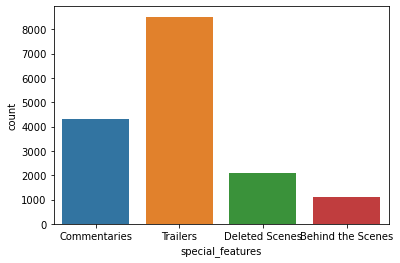

In [208]:
sns.countplot(x=data.special_features)


<AxesSubplot:xlabel='name', ylabel='count'>

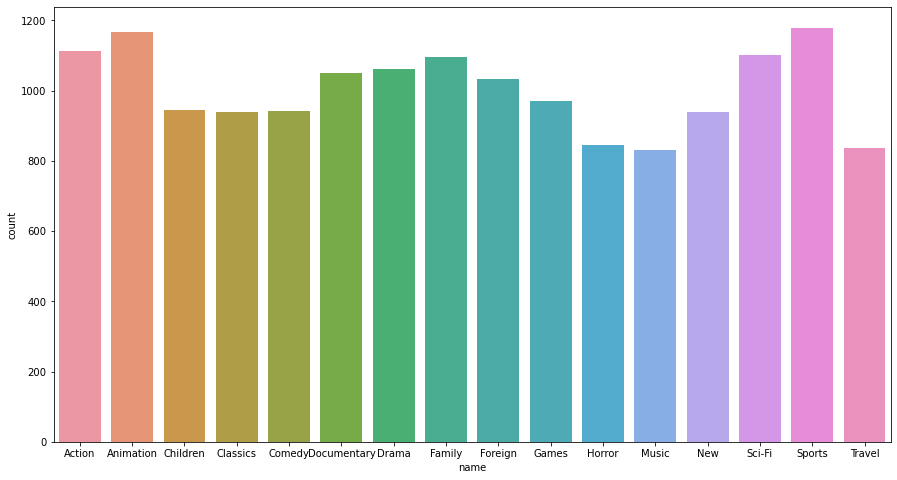

In [209]:
plt.figure(figsize = (15,8))
sns.countplot(x=data.name)

<AxesSubplot:xlabel='rating', ylabel='count'>

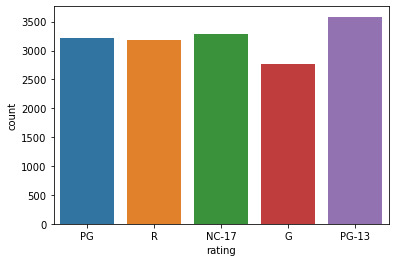

In [210]:
sns.countplot(x=data.rating)

<AxesSubplot:xlabel='store_id', ylabel='count'>

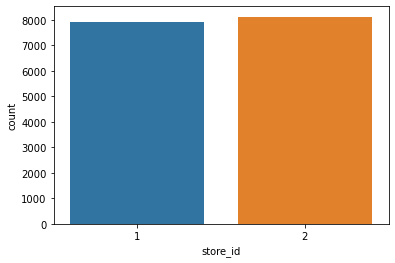

In [211]:
sns.countplot(x=data.store_id)

<AxesSubplot:xlabel='may_target', ylabel='count'>

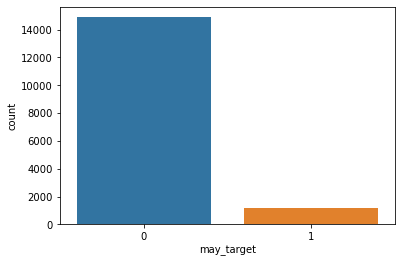

In [212]:
sns.countplot(x=data.may_target)   

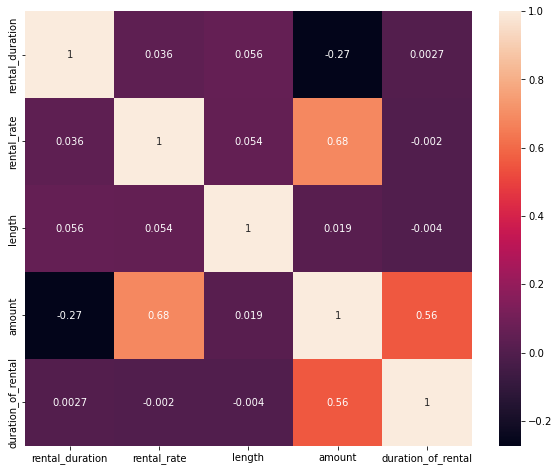

In [213]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

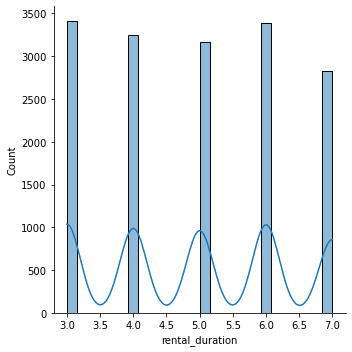

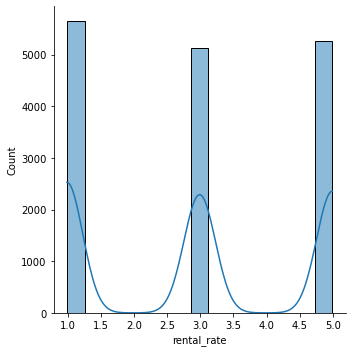

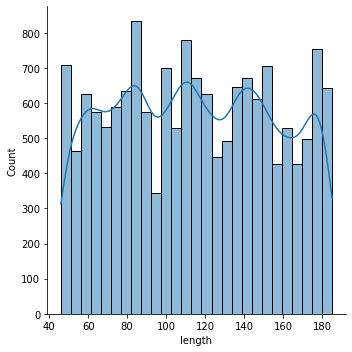

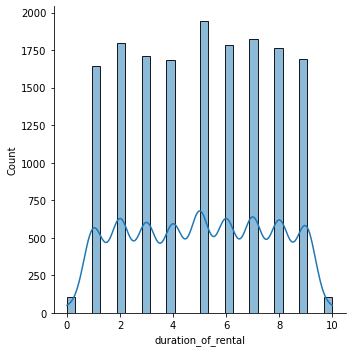

In [214]:
# look at the scale and distribution of values
sns.displot(data['rental_duration'], kde=True)
plt.show()

sns.displot(data['rental_rate'], kde=True)
plt.show()

sns.displot(data['length'], kde=True)
plt.show()

sns.displot(data['duration_of_rental'], kde=True)
plt.show()

In [215]:
# Need to X-y-split AND train-test-split BEFORE I apply transformations, 
# then train transformation on training set only
y = data['may_target']
X = data.drop('may_target', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [216]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)
 

In [217]:
# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,rental_duration,rental_rate,length,amount,duration_of_rental
0,1.0,0.0,0.064748,0.082569,0.4
1,0.5,1.0,0.244604,0.416180,0.5
2,1.0,0.0,0.460432,0.165972,0.8
3,0.0,0.0,0.172662,0.249374,0.5
4,1.0,0.5,0.237410,0.249374,0.5


In [218]:
X_train_categorical = X_train.select_dtypes(include = object)
X_train_categorical= X_train_categorical.drop(['film_id'], axis=1)
X_train_categorical

,title,rating,special_features,store_id,name
15993,WOLVES DESIRE,NC-17,Behind the Scenes,2,Travel
14538,LOSER HUSTLER,PG,Deleted Scenes,2,Sports
174,CELEBRITY HORN,PG-13,Deleted Scenes,1,Action
6083,WEDDING APOLLO,PG,Trailers,1,Documentary
9178,SHOCK CABIN,PG-13,Trailers,2,Foreign
...,...,...,...,...,...
3239,ARIZONA BANG,PG,Trailers,2,Classics
9448,DARLING BREAKING,PG-13,Commentaries,1,Games
860,SOUTH WAIT,R,Commentaries,1,Action
8381,ALLEY EVOLUTION,NC-17,Trailers,1,Foreign


In [220]:
X_train_cat = pd.get_dummies(X_train_categorical, 
                             columns=['rating', 'special_features', 'store_id', 'name'],
                             drop_first=True)
X_train_cat.head()

,title,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Commentaries,special_features_Deleted Scenes,special_features_Trailers,store_id_2,name_Animation,...,name_Drama,name_Family,name_Foreign,name_Games,name_Horror,name_Music,name_New,name_Sci-Fi,name_Sports,name_Travel
15993,WOLVES DESIRE,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
14538,LOSER HUSTLER,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
174,CELEBRITY HORN,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6083,WEDDING APOLLO,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9178,SHOCK CABIN,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [222]:
# build X_train and y_train
# remember: y = data['status'], y_train selected in train_test_split
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)
  

array([[1.0, 0.0, 0.06474820143884896, ..., 0, 0, 1],
       [0.5, 1.0, 0.24460431654676257, ..., 0, 1, 0],
       [1.0, 0.0, 0.4604316546762591, ..., 0, 0, 0],
       ...,
       [0.25, 0.5, 0.6978417266187051, ..., 0, 0, 0],
       [0.75, 0.5, 0.9640287769784175, ..., 0, 0, 0],
       [0.0, 0.5, 0.539568345323741, ..., 0, 0, 0]], dtype=object)